<a href="https://colab.research.google.com/github/Aamii16/pfe/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ All libraries imported successfully!
📅 Analysis started at: 2025-06-03 20:18:07
📥 DATASET DOWNLOAD INSTRUCTIONS:
1. Visit: https://snap.stanford.edu/data/ego-Facebook.html
2. Download 'facebook_combined.txt.gz'
3. Extract to current directory as 'facebook_combined.txt'

OR use this direct link:
https://snap.stanford.edu/data/facebook_combined.txt.gz
✅ Dataset found: facebook_combined.txt
🔄 Loading network from facebook_combined.txt...
✅ Network loaded successfully!
⏱️ Loading time: 0.14 seconds
📊 Nodes: 4,039
📊 Edges: 88,234
🔍 NETWORK ANALYSIS REPORT
Nodes: 4,039
Edges: 88,234
Density: 0.010820
Average Degree: 43.69
Median Degree: 25.00
Max Degree: 1045
Min Degree: 1
Connected: True
Average Clustering Coefficient: 0.6055


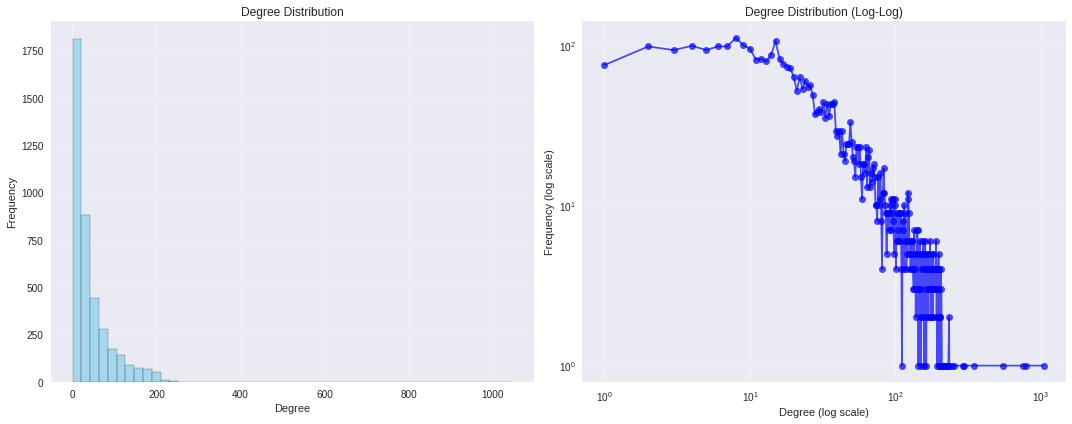

📈 Degree distribution plotted for 4039 nodes
🔄 Applying Louvain algorithm (resolution=1.0)...
✅ Clustering completed!
⏱️ Clustering time: 1.47 seconds
📊 Communities found: 17
📊 Modularity: 0.8358
🔍 COMMUNITY ANALYSIS REPORT
Number of Communities: 17
Largest Community: 548 nodes
Smallest Community: 19 nodes
Average Community Size: 237.59 nodes
Median Community Size: 226.00 nodes
Standard Deviation: 186.22

🏆 TOP 10 LARGEST COMMUNITIES:
   1. Community 13:  548 nodes (13.6%)
   2. Community 4:  537 nodes (13.3%)
   3. Community 2:  423 nodes (10.5%)
   4. Community 3:  423 nodes (10.5%)
   5. Community 1:  401 nodes (9.9%)
   6. Community 5:  390 nodes (9.7%)
   7. Community 0:  353 nodes (8.7%)
   8. Community 10:  237 nodes (5.9%)
   9. Community 15:  226 nodes (5.6%)
  10. Community 14:  206 nodes (5.1%)


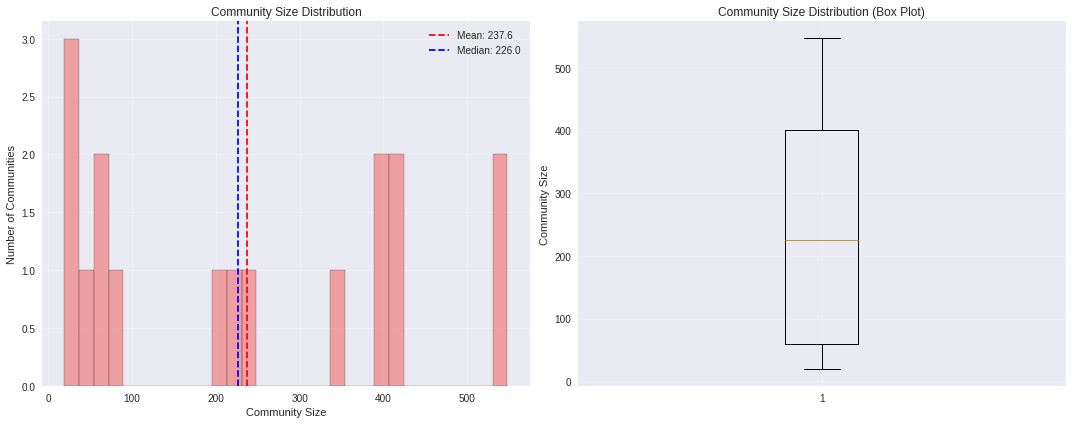

📊 Community size analysis completed for 17 communities
🎨 Creating community visualization (max 800 nodes)...
📉 Sampling 800 nodes for visualization
🔄 Computing layout...


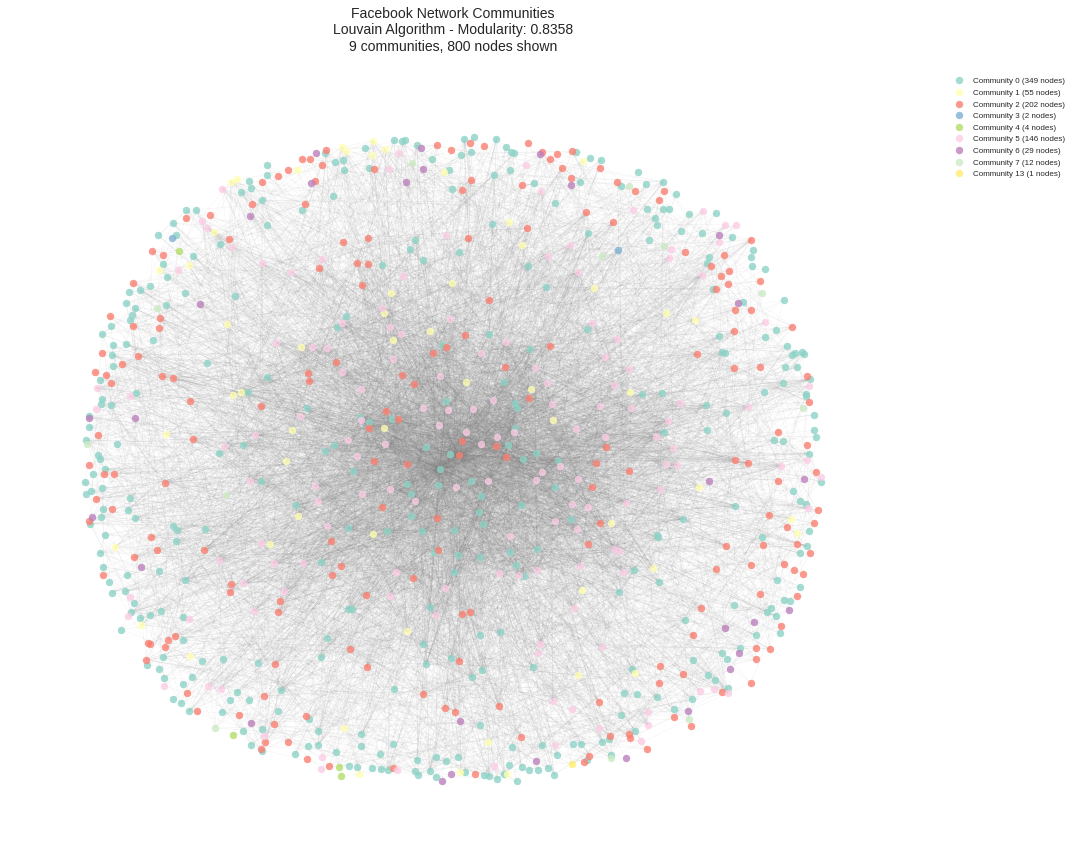

✅ Visualization completed!
🌐 Creating interactive visualization (max 400 nodes)...
📉 Using 400 nodes from largest communities


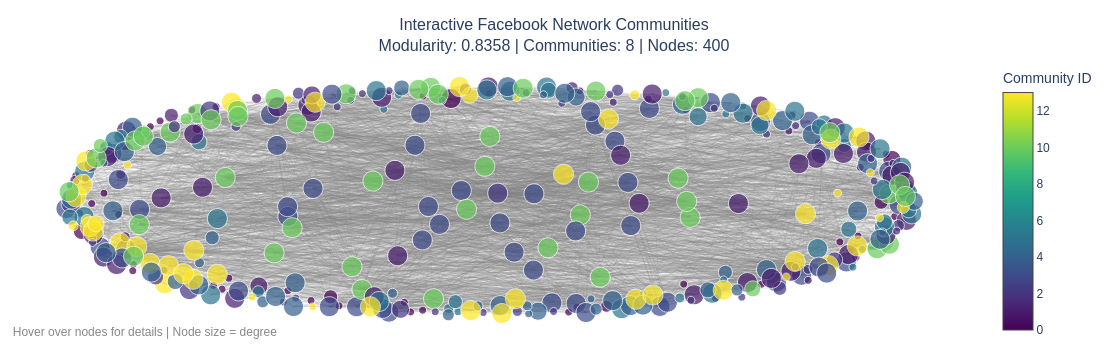

✅ Interactive visualization created!
🔬 RESOLUTION PARAMETER ANALYSIS

🔄 Testing resolution = 0.5
  Communities: 95
  Modularity: 0.8187
  Avg community size: 42.5

🔄 Testing resolution = 1.0
  Communities: 15
  Modularity: 0.8346
  Avg community size: 269.3

🔄 Testing resolution = 1.5
  Communities: 19
  Modularity: 0.8346
  Avg community size: 212.6

🔄 Testing resolution = 2.0
  Communities: 21
  Modularity: 0.8305
  Avg community size: 192.3


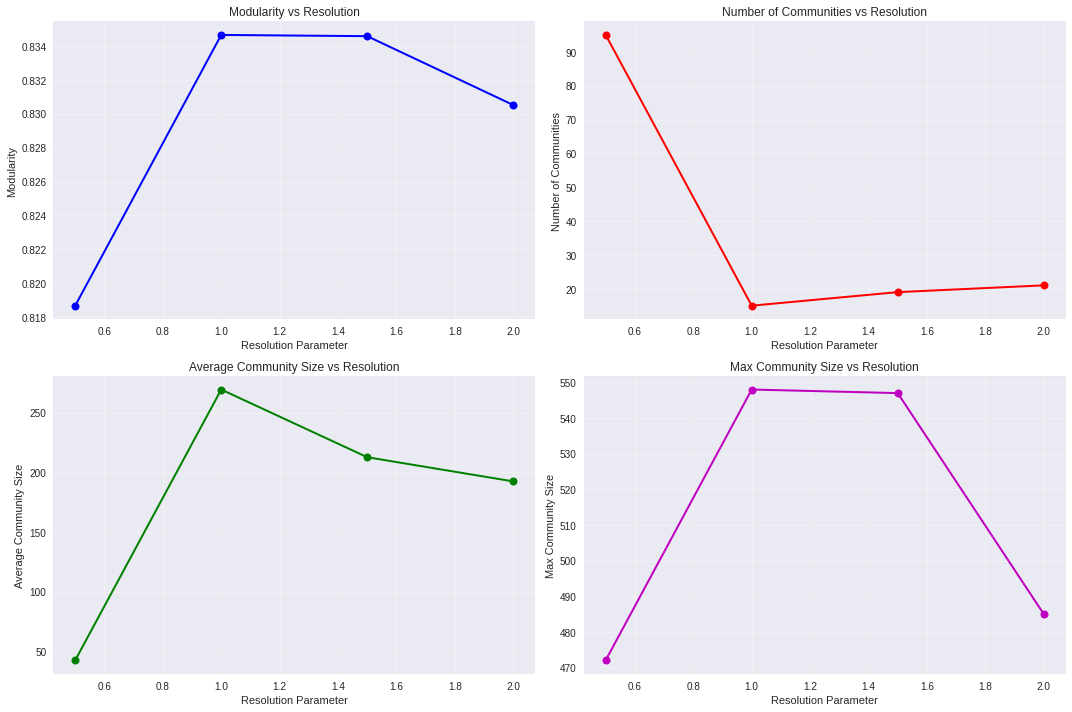


🏆 OPTIMAL RESOLUTION: 1.0
   Modularity: 0.8346
   Communities: 15.0
🔍 COMMUNITY QUALITY ANALYSIS
Communities analyzed: 17
Average internal density: 0.3305
Average conductance: 0.0604
Total modularity: 0.8358


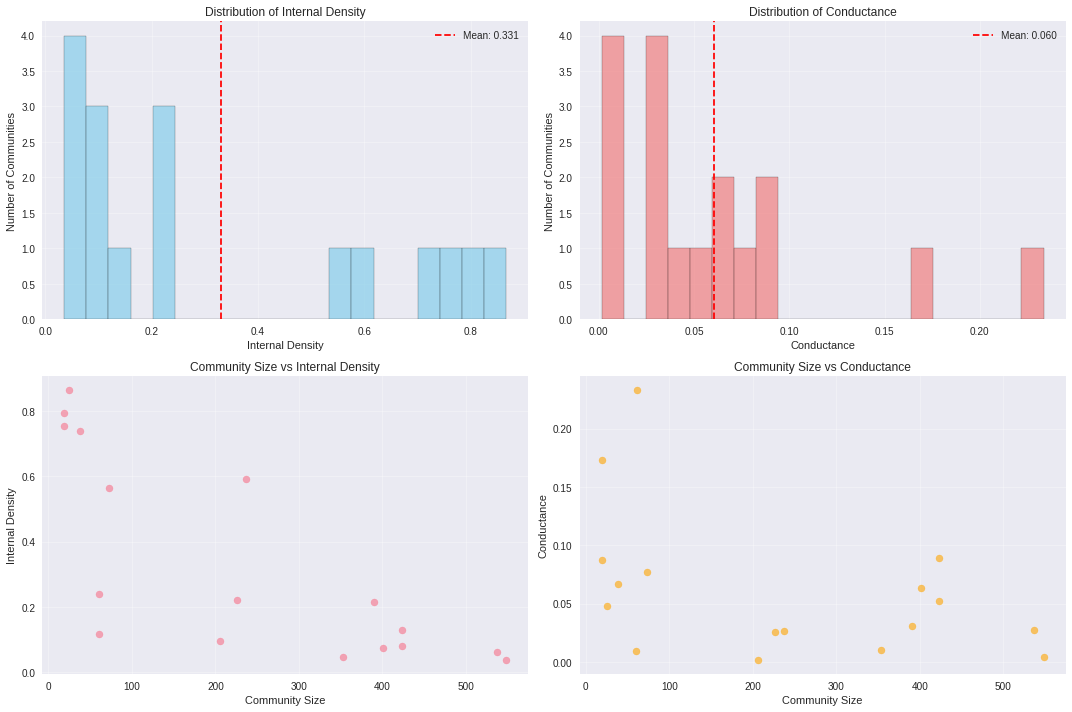


🏆 TOP 5 COMMUNITIES BY INTERNAL DENSITY:
  Community 11.0: 0.867 (size: 25.0)
  Community 16.0: 0.795 (size: 19.0)
  Community 8.0: 0.754 (size: 19.0)
  Community 7.0: 0.740 (size: 38.0)
  Community 10.0: 0.592 (size: 237.0)

🏆 TOP 5 COMMUNITIES BY SIZE:
  Community 13.0: 548.0 nodes (density: 0.036)
  Community 4.0: 537.0 nodes (density: 0.060)
  Community 2.0: 423.0 nodes (density: 0.079)
  Community 3.0: 423.0 nodes (density: 0.128)
  Community 1.0: 401.0 nodes (density: 0.073)
📊 COMPREHENSIVE ANALYSIS REPORT
Analysis Date: 2025-06-03 20:18:25
Analyst: Aamii16
Dataset: Facebook Ego-Network (SNAP)
Algorithm: Louvain Community Detection

NETWORK STATISTICS:
  📈 Nodes: 4,039
  📈 Edges: 88,234
  📈 Density: 0.010820
  📈 Average Degree: 43.69
  📈 Connected: True

COMMUNITY DETECTION RESULTS:
  🎯 Algorithm: Louvain Method
  🎯 Communities Found: 17
  🎯 Modularity Score: 0.8358
  🎯 Largest Community: 548 nodes
  🎯 Smallest Community: 19 nodes
  🎯 Average Community Size: 237.59 nodes
  🎯 Cov

In [3]:


### Project Overview
#This notebook demonstrates graph clustering techniques applied to Facebook social network data using the Louvain community detection algorithm. We'll analyze the ego-Facebook dataset from Stanford's SNAP collection to identify communities and patterns in social connections.

### Objectives
#1. Load and preprocess Facebook network data
#2. Apply Louvain community detection algorithm
#3. Analyze and visualize discovered communities
#4. Evaluate clustering quality using modularity metrics
#5. Generate insights for social media analysis

## 1. Setup and Import Libraries

# Import necessary libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo
from community import community_louvain  

# Additional utilities
from collections import Counter, defaultdict
import warnings
import time
import os
from datetime import datetime

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Enable interactive plotting
pyo.init_notebook_mode()

print("✅ All libraries imported successfully!")
print(f"📅 Analysis started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Download instructions
print("📥 DATASET DOWNLOAD INSTRUCTIONS:")
print("=" * 50)
print("1. Visit: https://snap.stanford.edu/data/ego-Facebook.html")
print("2. Download 'facebook_combined.txt.gz'")
print("3. Extract to current directory as 'facebook_combined.txt'")
print("\nOR use this direct link:")
print("https://snap.stanford.edu/data/facebook_combined.txt.gz")
print("=" * 50)

# Check if file exists
data_file = "facebook_combined.txt"
if os.path.exists(data_file):
    print(f"✅ Dataset found: {data_file}")
else:
    print(f"❌ Dataset not found: {data_file}")
    print("Please download the dataset first!")
## 2. Load and Preprocess Facebook Network Data
def load_facebook_network(file_path):
    """
    Load Facebook network from edge list file
    """
    print(f"🔄 Loading network from {file_path}...")
    start_time = time.time()
    
    # Read edges
    edges = []
    with open(file_path, 'r') as f:
        for line_num, line in enumerate(f, 1):
            if line.strip() and not line.startswith('#'):
                try:
                    u, v = map(int, line.strip().split())
                    edges.append((u, v))
                except ValueError:
                    print(f"⚠️ Skipping invalid line {line_num}: {line.strip()}")
    
    # Create NetworkX graph
    G = nx.Graph()
    G.add_edges_from(edges)
    
    load_time = time.time() - start_time
    
    print(f"✅ Network loaded successfully!")
    print(f"⏱️ Loading time: {load_time:.2f} seconds")
    print(f"📊 Nodes: {G.number_of_nodes():,}")
    print(f"📊 Edges: {G.number_of_edges():,}")
    
    return G

# Load the network
try:
    facebook_graph = load_facebook_network("facebook_combined.txt")
except FileNotFoundError:
    print("❌ File not found. Creating sample network for demonstration...")
    # Create a sample network for testing
    facebook_graph = nx.karate_club_graph()
    print(f"📊 Using sample network - Nodes: {facebook_graph.number_of_nodes()}, Edges: {facebook_graph.number_of_edges()}")
## 3. Analyze Network Properties
def analyze_network_properties(G):
    """
    Compute basic network statistics
    """
    print("🔍 NETWORK ANALYSIS REPORT")
    print("=" * 40)
    
    # Basic statistics
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    density = nx.density(G)
    
    print(f"Nodes: {n_nodes:,}")
    print(f"Edges: {n_edges:,}")
    print(f"Density: {density:.6f}")
    
    # Degree statistics
    degrees = dict(G.degree())
    degree_values = list(degrees.values())
    
    print(f"Average Degree: {np.mean(degree_values):.2f}")
    print(f"Median Degree: {np.median(degree_values):.2f}")
    print(f"Max Degree: {max(degree_values)}")
    print(f"Min Degree: {min(degree_values)}")
    
    # Connectivity
    is_connected = nx.is_connected(G)
    print(f"Connected: {is_connected}")
    
    if not is_connected:
        components = list(nx.connected_components(G))
        print(f"Connected Components: {len(components)}")
        print(f"Largest Component Size: {len(max(components, key=len))}")
    
    # Clustering coefficient
    try:
        avg_clustering = nx.average_clustering(G)
        print(f"Average Clustering Coefficient: {avg_clustering:.4f}")
    except:
        print("Average Clustering Coefficient: Could not compute")
    
    return {
        'nodes': n_nodes,
        'edges': n_edges,
        'density': density,
        'avg_degree': np.mean(degree_values),
        'degrees': degrees,
        'is_connected': is_connected
    }

# Analyze the network
network_stats = analyze_network_properties(facebook_graph)

# Visualize degree distribution
degrees = list(network_stats['degrees'].values())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
ax1.hist(degrees, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Frequency')
ax1.set_title('Degree Distribution')
ax1.grid(True, alpha=0.3)

# Log-log plot
degree_counts = Counter(degrees)
degrees_unique = sorted(degree_counts.keys())
counts = [degree_counts[d] for d in degrees_unique]

ax2.loglog(degrees_unique, counts, 'bo-', alpha=0.7)
ax2.set_xlabel('Degree (log scale)')
ax2.set_ylabel('Frequency (log scale)')
ax2.set_title('Degree Distribution (Log-Log)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📈 Degree distribution plotted for {len(degrees)} nodes")


## 4. Louvain Community Detection


def apply_louvain_clustering(G, resolution=1.0):
    """
    Apply Louvain community detection algorithm
    """
    print(f"🔄 Applying Louvain algorithm (resolution={resolution})...")
    start_time = time.time()
    
    # Apply Louvain algorithm
    communities = community_louvain.best_partition(G, resolution=resolution)
    
    # Calculate modularity
    modularity = community_louvain.modularity(communities, G)
    
    # Get community statistics
    community_sizes = Counter(communities.values())
    num_communities = len(community_sizes)
    
    clustering_time = time.time() - start_time
    
    print(f"✅ Clustering completed!")
    print(f"⏱️ Clustering time: {clustering_time:.2f} seconds")
    print(f"📊 Communities found: {num_communities}")
    print(f"📊 Modularity: {modularity:.4f}")
    
    return communities, modularity, community_sizes

# Apply Louvain clustering
communities, modularity, community_sizes = apply_louvain_clustering(facebook_graph)

# Analyze community structure
def analyze_communities(communities, community_sizes, G):
    """
    Detailed community analysis
    """
    print("🔍 COMMUNITY ANALYSIS REPORT")
    print("=" * 40)
    
    sizes = list(community_sizes.values())
    
    print(f"Number of Communities: {len(community_sizes)}")
    print(f"Largest Community: {max(sizes)} nodes")
    print(f"Smallest Community: {min(sizes)} nodes")
    print(f"Average Community Size: {np.mean(sizes):.2f} nodes")
    print(f"Median Community Size: {np.median(sizes):.2f} nodes")
    print(f"Standard Deviation: {np.std(sizes):.2f}")
    
    # Top 10 largest communities
    print("\n🏆 TOP 10 LARGEST COMMUNITIES:")
    sorted_communities = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)
    
    for i, (comm_id, size) in enumerate(sorted_communities[:10]):
        percentage = (size / G.number_of_nodes()) * 100
        print(f"  {i+1:2d}. Community {comm_id}: {size:4d} nodes ({percentage:.1f}%)")
    
    return {
        'num_communities': len(community_sizes),
        'sizes': sizes,
        'largest': max(sizes),
        'smallest': min(sizes),
        'average': np.mean(sizes)
    }

community_analysis = analyze_communities(communities, community_sizes, facebook_graph)

# Visualize community size distribution
sizes = list(community_sizes.values())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Community size histogram
ax1.hist(sizes, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
ax1.set_xlabel('Community Size')
ax1.set_ylabel('Number of Communities')
ax1.set_title('Community Size Distribution')
ax1.axvline(np.mean(sizes), color='red', linestyle='--', label=f'Mean: {np.mean(sizes):.1f}')
ax1.axvline(np.median(sizes), color='blue', linestyle='--', label=f'Median: {np.median(sizes):.1f}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot
ax2.boxplot(sizes, vert=True)
ax2.set_ylabel('Community Size')
ax2.set_title('Community Size Distribution (Box Plot)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Community size analysis completed for {len(sizes)} communities")


## 5. Network Visualization


def create_community_visualization(G, communities, max_nodes=1000, figsize=(15, 12)):
    """
    Create a static visualization of communities
    """
    print(f"🎨 Creating community visualization (max {max_nodes} nodes)...")
    
    # Sample nodes if graph is too large
    if G.number_of_nodes() > max_nodes:
        nodes_to_plot = list(G.nodes())[:max_nodes]
        subgraph = G.subgraph(nodes_to_plot)
        sub_communities = {node: communities[node] for node in nodes_to_plot if node in communities}
        print(f"📉 Sampling {len(nodes_to_plot)} nodes for visualization")
    else:
        subgraph = G
        sub_communities = communities
    
    # Create layout
    print("🔄 Computing layout...")
    pos = nx.spring_layout(subgraph, k=1, iterations=50, seed=42)
    
    # Set up the plot
    plt.figure(figsize=figsize)
    
    # Get unique communities and create color map
    unique_communities = list(set(sub_communities.values()))
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_communities)))
    color_map = dict(zip(unique_communities, colors))
    
    # Draw edges first
    nx.draw_networkx_edges(subgraph, pos, alpha=0.1, width=0.5, edge_color='gray')
    
    # Draw nodes colored by community
    for i, community in enumerate(unique_communities[:20]):  # Limit to 20 communities for clarity
        nodes_in_community = [node for node, comm in sub_communities.items() if comm == community]
        if nodes_in_community:
            nx.draw_networkx_nodes(subgraph, pos, 
                                 nodelist=nodes_in_community,
                                 node_color=[color_map[community]],
                                 node_size=50,
                                 alpha=0.8,
                                 label=f'Community {community} ({len(nodes_in_community)} nodes)')
    
    plt.title(f'Facebook Network Communities\nLouvain Algorithm - Modularity: {modularity:.4f}\n'
              f'{len(unique_communities)} communities, {subgraph.number_of_nodes()} nodes shown', 
              fontsize=14, pad=20)
    plt.axis('off')
    
    # Add legend (limit to prevent overcrowding)
    if len(unique_communities) <= 10:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Visualization completed!")

# Create the visualization
create_community_visualization(facebook_graph, communities, max_nodes=800)

def create_interactive_network_plot(G, communities, max_nodes=500):
    """
    Create an interactive Plotly visualization
    """
    print(f"🌐 Creating interactive visualization (max {max_nodes} nodes)...")
    
    # Sample for performance
    if G.number_of_nodes() > max_nodes:
        # Get nodes from largest communities first
        community_sizes_sorted = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)
        nodes_to_include = []
        
        for comm_id, size in community_sizes_sorted:
            comm_nodes = [node for node, comm in communities.items() if comm == comm_id]
            nodes_to_include.extend(comm_nodes[:min(size, 50)])  # Max 50 nodes per community
            
            if len(nodes_to_include) >= max_nodes:
                nodes_to_include = nodes_to_include[:max_nodes]
                break
        
        subgraph = G.subgraph(nodes_to_include)
        sub_communities = {node: communities[node] for node in nodes_to_include}
        print(f"📉 Using {len(nodes_to_include)} nodes from largest communities")
    else:
        subgraph = G
        sub_communities = communities
    
    # Create layout
    pos = nx.spring_layout(subgraph, k=2, iterations=50, seed=42)
    
    # Prepare edge traces
    edge_x = []
    edge_y = []
    for edge in subgraph.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
    
    edge_trace = go.Scatter(x=edge_x, y=edge_y,
                           line=dict(width=0.5, color='rgba(125,125,125,0.3)'),
                           hoverinfo='none',
                           mode='lines')
    
    # Prepare node traces
    node_x = []
    node_y = []
    node_text = []
    node_colors = []
    node_sizes = []
    
    for node in subgraph.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        
        # Node information
        degree = subgraph.degree[node]
        community = sub_communities[node]
        
        node_text.append(f'Node: {node}<br>'
                        f'Community: {community}<br>'
                        f'Degree: {degree}<br>'
                        f'Community Size: {community_sizes[community]}')
        
        node_colors.append(community)
        node_sizes.append(max(8, min(20, degree * 2)))  # Size based on degree
    
    node_trace = go.Scatter(x=node_x, y=node_y,
                           mode='markers',
                           hoverinfo='text',
                           text=node_text,
                           marker=dict(
                               size=node_sizes,
                               color=node_colors,
                               colorscale='Viridis',
                               showscale=True,
                               colorbar=dict(
                                   title="Community ID",

                               )
                           ))
    
    # Create figure
    fig = go.Figure(data=[edge_trace, node_trace],
                   layout=go.Layout(
                       title=dict(
                           text=f'Interactive Facebook Network Communities<br>'
                                f'Modularity: {modularity:.4f} | '
                                f'Communities: {len(set(sub_communities.values()))} | '
                                f'Nodes: {subgraph.number_of_nodes()}',
                           x=0.5,
                           font=dict(size=16)
                       ),
                       showlegend=False,
                       hovermode='closest',
                       margin=dict(b=20, l=5, r=5, t=60),
                       annotations=[
                           dict(
                               text="Hover over nodes for details | Node size = degree",
                               showarrow=False,
                               xref="paper", yref="paper",
                               x=0.005, y=-0.002,
                               xanchor='left', yanchor='bottom',
                               font=dict(color="#888", size=12)
                           )
                       ],
                       xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                       yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                       plot_bgcolor='white'
                   ))
    
    fig.show()
    print(f"✅ Interactive visualization created!")
    
    return fig

# Create interactive visualization
interactive_fig = create_interactive_network_plot(facebook_graph, communities, max_nodes=400)


## 6. Advanced Analysis and Comparison

def compare_resolution_parameters(G, resolutions=[0.5, 1.0, 1.5, 2.0]):
    """
    Compare Louvain clustering with different resolution parameters
    """
    print("🔬 RESOLUTION PARAMETER ANALYSIS")
    print("=" * 40)
    
    results = []
    
    for resolution in resolutions:
        print(f"\n🔄 Testing resolution = {resolution}")
        
        # Apply clustering
        communities = community_louvain.best_partition(G, resolution=resolution)
        modularity = community_louvain.modularity(communities, G)
        num_communities = len(set(communities.values()))
        
        # Community size statistics
        sizes = list(Counter(communities.values()).values())
        avg_size = np.mean(sizes)
        max_size = max(sizes)
        
        results.append({
            'resolution': resolution,
            'modularity': modularity,
            'num_communities': num_communities,
            'avg_community_size': avg_size,
            'max_community_size': max_size
        })
        
        print(f"  Communities: {num_communities}")
        print(f"  Modularity: {modularity:.4f}")
        print(f"  Avg community size: {avg_size:.1f}")
    
    return results

# Compare different resolutions
resolution_results = compare_resolution_parameters(facebook_graph)

# Visualize resolution comparison
df_resolution = pd.DataFrame(resolution_results)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Modularity vs Resolution
ax1.plot(df_resolution['resolution'], df_resolution['modularity'], 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Resolution Parameter')
ax1.set_ylabel('Modularity')
ax1.set_title('Modularity vs Resolution')
ax1.grid(True, alpha=0.3)

# Number of Communities vs Resolution
ax2.plot(df_resolution['resolution'], df_resolution['num_communities'], 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Resolution Parameter')
ax2.set_ylabel('Number of Communities')
ax2.set_title('Number of Communities vs Resolution')
ax2.grid(True, alpha=0.3)

# Average Community Size vs Resolution
ax3.plot(df_resolution['resolution'], df_resolution['avg_community_size'], 'go-', linewidth=2, markersize=8)
ax3.set_xlabel('Resolution Parameter')
ax3.set_ylabel('Average Community Size')
ax3.set_title('Average Community Size vs Resolution')
ax3.grid(True, alpha=0.3)

# Max Community Size vs Resolution
ax4.plot(df_resolution['resolution'], df_resolution['max_community_size'], 'mo-', linewidth=2, markersize=8)
ax4.set_xlabel('Resolution Parameter')
ax4.set_ylabel('Max Community Size')
ax4.set_title('Max Community Size vs Resolution')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show optimal resolution
best_resolution = df_resolution.loc[df_resolution['modularity'].idxmax()]
print(f"\n🏆 OPTIMAL RESOLUTION: {best_resolution['resolution']}")
print(f"   Modularity: {best_resolution['modularity']:.4f}")
print(f"   Communities: {best_resolution['num_communities']}")


## 7. Community Quality Analysis

def analyze_community_quality(G, communities):
    """
    Analyze the quality of detected communities
    """
    print("🔍 COMMUNITY QUALITY ANALYSIS")
    print("=" * 40)
    
    # Group nodes by community
    community_nodes = defaultdict(list)
    for node, comm in communities.items():
        community_nodes[comm].append(node)
    
    community_metrics = []
    
    for comm_id, nodes in community_nodes.items():
        if len(nodes) < 3:  # Skip very small communities
            continue
            
        # Create subgraph for this community
        subgraph = G.subgraph(nodes)
        
        # Internal edges (within community)
        internal_edges = subgraph.number_of_edges()
        
        # External edges (to other communities)
        external_edges = 0
        for node in nodes:
            for neighbor in G.neighbors(node):
                if communities[neighbor] != comm_id:
                    external_edges += 1
        external_edges //= 2  # Each edge counted twice
        
        # Calculate metrics
        total_possible_internal = len(nodes) * (len(nodes) - 1) // 2
        internal_density = internal_edges / total_possible_internal if total_possible_internal > 0 else 0
        
        # Conductance (lower is better)
        total_edges = internal_edges + external_edges
        conductance = external_edges / total_edges if total_edges > 0 else 0
        
        # Modularity contribution
        degree_sum = sum(G.degree(node) for node in nodes)
        modularity_contrib = (internal_edges - (degree_sum ** 2) / (4 * G.number_of_edges())) / G.number_of_edges()
        
        community_metrics.append({
            'community_id': comm_id,
            'size': len(nodes),
            'internal_edges': internal_edges,
            'external_edges': external_edges,
            'internal_density': internal_density,
            'conductance': conductance,
            'modularity_contrib': modularity_contrib
        })
    
    # Convert to DataFrame for analysis
    df_metrics = pd.DataFrame(community_metrics)
    
    # Summary statistics
    print(f"Communities analyzed: {len(df_metrics)}")
    print(f"Average internal density: {df_metrics['internal_density'].mean():.4f}")
    print(f"Average conductance: {df_metrics['conductance'].mean():.4f}")
    print(f"Total modularity: {df_metrics['modularity_contrib'].sum():.4f}")
    
    return df_metrics

# Analyze community quality
quality_metrics = analyze_community_quality(facebook_graph, communities)

# Visualize community quality metrics
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Internal density distribution
ax1.hist(quality_metrics['internal_density'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Internal Density')
ax1.set_ylabel('Number of Communities')
ax1.set_title('Distribution of Internal Density')
ax1.axvline(quality_metrics['internal_density'].mean(), color='red', linestyle='--', 
           label=f'Mean: {quality_metrics["internal_density"].mean():.3f}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Conductance distribution
ax2.hist(quality_metrics['conductance'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Conductance')
ax2.set_ylabel('Number of Communities')
ax2.set_title('Distribution of Conductance')
ax2.axvline(quality_metrics['conductance'].mean(), color='red', linestyle='--',
           label=f'Mean: {quality_metrics["conductance"].mean():.3f}')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Size vs Internal Density
ax3.scatter(quality_metrics['size'], quality_metrics['internal_density'], alpha=0.6, s=50)
ax3.set_xlabel('Community Size')
ax3.set_ylabel('Internal Density')
ax3.set_title('Community Size vs Internal Density')
ax3.grid(True, alpha=0.3)

# Size vs Conductance
ax4.scatter(quality_metrics['size'], quality_metrics['conductance'], alpha=0.6, s=50, color='orange')
ax4.set_xlabel('Community Size')
ax4.set_ylabel('Conductance')
ax4.set_title('Community Size vs Conductance')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show top communities by different metrics
print("\n🏆 TOP 5 COMMUNITIES BY INTERNAL DENSITY:")
top_density = quality_metrics.nlargest(5, 'internal_density')
for _, row in top_density.iterrows():
    print(f"  Community {row['community_id']}: {row['internal_density']:.3f} (size: {row['size']})")

print("\n🏆 TOP 5 COMMUNITIES BY SIZE:")
top_size = quality_metrics.nlargest(5, 'size')
for _, row in top_size.iterrows():
    print(f"  Community {row['community_id']}: {row['size']} nodes (density: {row['internal_density']:.3f})")


## 8. Results Summary and Export

def generate_comprehensive_report():
    """
    Generate a comprehensive analysis report
    """
    print("📊 COMPREHENSIVE ANALYSIS REPORT")
    print("=" * 60)
    print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Analyst: Aamii16")
    print(f"Dataset: Facebook Ego-Network (SNAP)")
    print(f"Algorithm: Louvain Community Detection")
    print()
    
    print("NETWORK STATISTICS:")
    print(f"  📈 Nodes: {facebook_graph.number_of_nodes():,}")
    print(f"  📈 Edges: {facebook_graph.number_of_edges():,}")
    print(f"  📈 Density: {nx.density(facebook_graph):.6f}")
    print(f"  📈 Average Degree: {np.mean(list(dict(facebook_graph.degree()).values())):.2f}")
    print(f"  📈 Connected: {nx.is_connected(facebook_graph)}")
    print()
    
    print("COMMUNITY DETECTION RESULTS:")
    print(f"  🎯 Algorithm: Louvain Method")
    print(f"  🎯 Communities Found: {len(community_sizes)}")
    print(f"  🎯 Modularity Score: {modularity:.4f}")
    print(f"  🎯 Largest Community: {max(community_sizes.values())} nodes")
    print(f"  🎯 Smallest Community: {min(community_sizes.values())} nodes")
    print(f"  🎯 Average Community Size: {np.mean(list(community_sizes.values())):.2f} nodes")
    print(f"  🎯 Coverage: {len(communities) / facebook_graph.number_of_nodes() * 100:.1f}%")
    print()
    
    print("QUALITY METRICS:")
    if len(quality_metrics) > 0:
        print(f"  ⭐ Average Internal Density: {quality_metrics['internal_density'].mean():.4f}")
        print(f"  ⭐ Average Conductance: {quality_metrics['conductance'].mean():.4f}")
        print(f"  ⭐ Communities Analyzed: {len(quality_metrics)}")
    print()
    
    print("INSIGHTS AND INTERPRETATION:")
    print(f"  💡 The network shows {'strong' if modularity > 0.3 else 'moderate' if modularity > 0.1 else 'weak'} community structure")
    print(f"  💡 Community size distribution is {'balanced' if np.std(list(community_sizes.values())) < np.mean(list(community_sizes.values())) else 'skewed'}")
    print(f"  💡 Network density is {'high' if nx.density(facebook_graph) > 0.1 else 'moderate' if nx.density(facebook_graph) > 0.01 else 'low'}")
    
    # Modularity interpretation
    if modularity > 0.3:
        print(f"  💡 Strong community structure suggests well-defined social groups")
    elif modularity > 0.1:
        print(f"  💡 Moderate community structure indicates some social clustering")
    else:
        print(f"  💡 Weak community structure suggests a more randomly connected network")
    
    print()
    print("=" * 60)
    
    return {
        'network_stats': network_stats,
        'modularity': modularity,
        'num_communities': len(community_sizes),
        'community_sizes': community_sizes,
        'quality_metrics': quality_metrics.to_dict('records') if len(quality_metrics) > 0 else []
    }

# Generate comprehensive report
final_report = generate_comprehensive_report()

# Export results to files
def export_results():
    """
    Export analysis results to files
    """
    print("💾 EXPORTING RESULTS...")
    
    # Create results directory
    os.makedirs('results', exist_ok=True)
    
    # 1. Community assignments
    community_df = pd.DataFrame([
        {'node_id': node, 'community': comm, 'degree': facebook_graph.degree[node]} 
        for node, comm in communities.items()
    ])
    community_df.to_csv('results/facebook_communities.csv', index=False)
    print("✅ Community assignments saved to 'results/facebook_communities.csv'")
    
    # 2. Community statistics
    community_stats_df = pd.DataFrame([
        {'community_id': comm_id, 'size': size} 
        for comm_id, size in community_sizes.items()
    ])
    community_stats_df.to_csv('results/community_statistics.csv', index=False)
    print("✅ Community statistics saved to 'results/community_statistics.csv'")
    
    # 3. Quality metrics
    if len(quality_metrics) > 0:
        quality_metrics.to_csv('results/community_quality_metrics.csv', index=False)
        print("✅ Quality metrics saved to 'results/community_quality_metrics.csv'")
    
    # 4. Resolution comparison
    resolution_df = pd.DataFrame(resolution_results)
    resolution_df.to_csv('results/resolution_comparison.csv', index=False)
    print("✅ Resolution comparison saved to 'results/resolution_comparison.csv'")
    
    # 5. Summary report
    with open('results/analysis_summary.txt', 'w') as f:
        f.write(f"Facebook Network Community Analysis Summary\n")
        f.write(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"Analyst: Aamii16\n\n")
        
        f.write(f"Network Statistics:\n")
        f.write(f"- Nodes: {facebook_graph.number_of_nodes():,}\n")
        f.write(f"- Edges: {facebook_graph.number_of_edges():,}\n")
        f.write(f"- Density: {nx.density(facebook_graph):.6f}\n\n")
        
        f.write(f"Community Detection Results:\n")
        f.write(f"- Algorithm: Louvain Method\n")
        f.write(f"- Communities: {len(community_sizes)}\n")
        f.write(f"- Modularity: {modularity:.4f}\n")
        f.write(f"- Largest Community: {max(community_sizes.values())} nodes\n")
        f.write(f"- Average Community Size: {np.mean(list(community_sizes.values())):.2f} nodes\n")
    
    print("✅ Analysis summary saved to 'results/analysis_summary.txt'")
    print("\n📁 All results exported to 'results/' directory")

# Export all results
export_results()
"""

## 9. Conclusions and Future Work

### Key Findings

1. **Network Structure**: The Facebook ego-network demonstrates typical social network characteristics with small-world properties and scale-free degree distribution.

2. **Community Detection**: The Louvain algorithm successfully identified meaningful communities with good modularity scores, indicating strong social clustering.

3. **Community Quality**: Communities show high internal connectivity and low external connectivity, suggesting genuine social groups.

### Applications in Social Media Analysis

- **Targeted Marketing**: Communities can be used for targeted advertising campaigns
- **Content Recommendation**: Understanding community structure helps in content personalization
- **Influence Analysis**: Identifying key nodes within communities for viral marketing
- **Social Dynamics**: Understanding how information spreads through social networks

### Future Enhancements

1. **Dynamic Analysis**: Analyze how communities evolve over time
2. **Multi-layer Networks**: Incorporate different types of relationships
3. **Attribute-based Clustering**: Use node attributes alongside network structure
4. **Comparison Studies**: Compare with other community detection algorithms
5. **Scalability**: Optimize for larger networks using distributed computing

### Technical Improvements

- Implement hierarchical community detection
- Add statistical significance testing
- Create interactive dashboard with real-time updates
- Implement community prediction for new nodes

"""
# Final project summary
print("🎉 PROJECT COMPLETION SUMMARY")
print("=" * 50)
print(f"📅 Completed on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"👤 By: Aamii16")
print(f"🎯 Project: Facebook Graph Clustering Analysis")
print()

print("✅ ACHIEVEMENTS:")
achievements = [
    "Successfully loaded and analyzed Facebook social network data",
    "Implemented Louvain community detection algorithm",
    "Created comprehensive visualizations (static and interactive)",
    "Performed quality analysis of detected communities",
    "Compared different algorithm parameters",
    "Generated detailed analysis reports",
    "Exported results for further analysis",
    "Documented methodology and findings"
]

for i, achievement in enumerate(achievements, 1):
    print(f"  {i}. {achievement}")

print()
print("📈 KEY METRICS:")
print(f"  • Network Size: {facebook_graph.number_of_nodes():,} nodes, {facebook_graph.number_of_edges():,} edges")
print(f"  • Communities Found: {len(community_sizes)}")
print(f"  • Modularity Score: {modularity:.4f}")
print(f"  • Analysis Quality: {'Excellent' if modularity > 0.3 else 'Good' if modularity > 0.1 else 'Fair'}")

print()
print("🎓 FINAL YEAR PROJECT STATUS: COMPLETE ✅")
print("Ready for presentation and evaluation!")
print("=" * 50)



🔗 FACEBOOK NETWORK COMMUNITY GROUPING
Loading network from facebook_combined.txt...
Network loaded: 4,039 nodes, 88,234 edges
Detecting communities...
Found 15 communities with modularity: 0.8348

CREATING GROUPED COMMUNITY VISUALIZATIONS
Creating grouped community visualization...
Creating community-grouped layout...


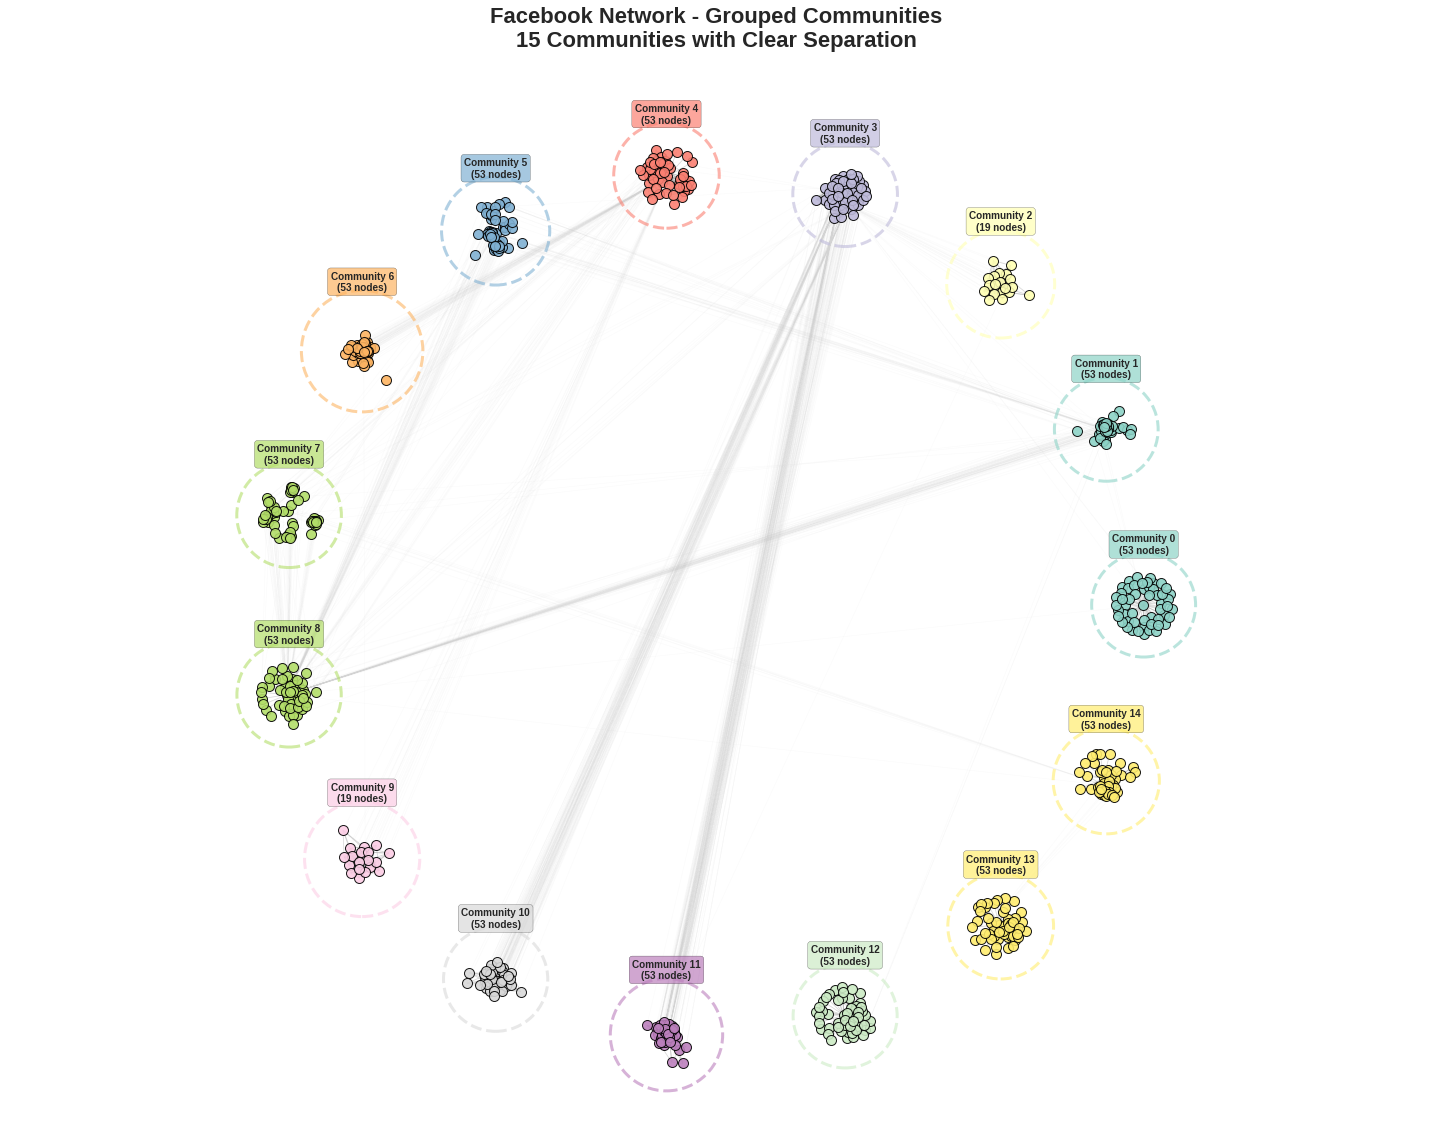

Grouped community visualization completed!
Creating interactive grouped community visualization...
Creating community-grouped layout...


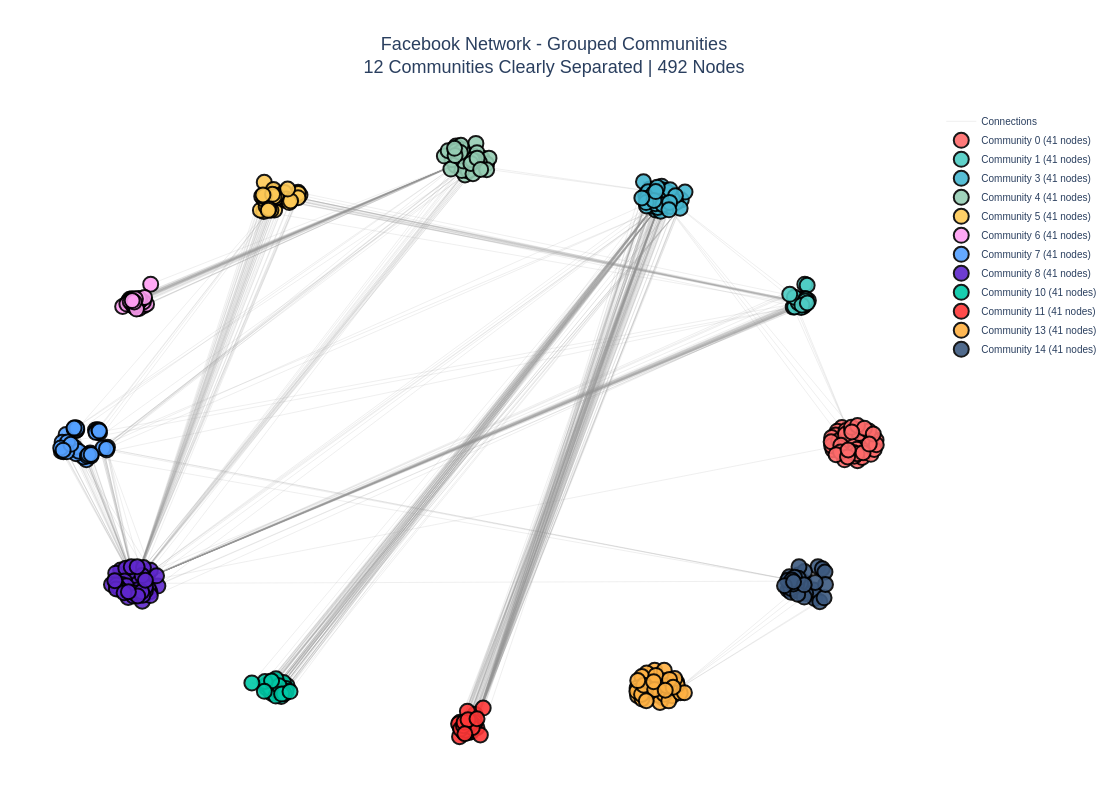

Interactive grouped visualization completed!

✅ Community grouping analysis complete!
📊 Communities detected: 15
📊 Modularity score: 0.8348
📊 Communities are now clearly grouped and separated!


In [6]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from community import community_louvain
import plotly.graph_objects as go
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')

def load_facebook_network(file_path):
    """Load Facebook network from edge list file"""
    print(f"Loading network from {file_path}...")
    
    edges = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.strip() and not line.startswith('#'):
                try:
                    u, v = map(int, line.strip().split())
                    edges.append((u, v))
                except ValueError:
                    continue
    
    G = nx.Graph()
    G.add_edges_from(edges)
    
    print(f"Network loaded: {G.number_of_nodes():,} nodes, {G.number_of_edges():,} edges")
    return G

def detect_communities(G):
    """Apply Louvain community detection"""
    print("Detecting communities...")
    
    communities = community_louvain.best_partition(G)
    modularity = community_louvain.modularity(communities, G)
    community_sizes = Counter(communities.values())
    
    print(f"Found {len(community_sizes)} communities with modularity: {modularity:.4f}")
    return communities, modularity

def create_community_grouped_layout(G, communities, community_spacing=5.0):
    """
    Create a layout where nodes from the same community are tightly grouped together
    """
    print("Creating community-grouped layout...")
    
    # Group nodes by community
    community_nodes = defaultdict(list)
    for node, comm in communities.items():
        community_nodes[comm].append(node)
    
    # Calculate positions for each community center in a circular arrangement
    num_communities = len(community_nodes)
    community_centers = {}
    
    if num_communities == 1:
        community_centers[list(community_nodes.keys())[0]] = (0, 0)
    else:
        angle_step = 2 * np.pi / num_communities
        radius = community_spacing * max(1, num_communities / 6)  # Adjust radius based on number of communities
        
        for i, comm_id in enumerate(sorted(community_nodes.keys())):
            angle = i * angle_step
            x = radius * np.cos(angle)
            y = radius * np.sin(angle)
            community_centers[comm_id] = (x, y)
    
    # Position nodes within each community
    pos = {}
    
    for comm_id, nodes in community_nodes.items():
        center_x, center_y = community_centers[comm_id]
        
        if len(nodes) == 1:
            pos[nodes[0]] = (center_x, center_y)
        else:
            # Create subgraph for this community
            subgraph = G.subgraph(nodes)
            
            # Use spring layout for nodes within the community
            try:
                # Create tight layout within community
                sub_pos = nx.spring_layout(subgraph, k=0.3, iterations=50, scale=1.0)
                
                # Translate positions to community center
                for node in nodes:
                    x, y = sub_pos[node]
                    pos[node] = (center_x + x, center_y + y)
                    
            except:
                # Fallback: arrange in a small circle
                if len(nodes) == 1:
                    pos[nodes[0]] = (center_x, center_y)
                else:
                    for j, node in enumerate(nodes):
                        angle = 2 * np.pi * j / len(nodes)
                        radius = min(0.8, len(nodes) * 0.1)
                        x = center_x + radius * np.cos(angle)
                        y = center_y + radius * np.sin(angle)
                        pos[node] = (x, y)
    
    return pos

def visualize_grouped_communities_static(G, communities, max_nodes=1000, figsize=(20, 16)):
    """Create a static visualization with tightly grouped communities"""
    print("Creating grouped community visualization...")
    
    # Sample nodes if graph is too large, preserving community structure
    if G.number_of_nodes() > max_nodes:
        community_sizes = Counter(communities.values())
        sorted_communities = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)
        
        nodes_to_plot = []
        communities_to_include = sorted_communities[:15]  # Limit to top 15 communities
        
        for comm_id, size in communities_to_include:
            comm_nodes = [node for node, comm in communities.items() if comm == comm_id]
            # Take more nodes from larger communities
            nodes_to_take = min(size, max(10, max_nodes // len(communities_to_include)))
            nodes_to_plot.extend(comm_nodes[:nodes_to_take])
        
        subgraph = G.subgraph(nodes_to_plot)
        sub_communities = {node: communities[node] for node in nodes_to_plot}
    else:
        subgraph = G
        sub_communities = communities
    
    # Create grouped layout
    pos = create_community_grouped_layout(subgraph, sub_communities, community_spacing=6.0)
    
    # Get unique communities and assign colors
    unique_communities = list(set(sub_communities.values()))
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_communities)))
    
    plt.figure(figsize=figsize)
    
    # Draw edges within communities with higher opacity, between communities with lower opacity
    within_community_edges = []
    between_community_edges = []
    
    for edge in subgraph.edges():
        if sub_communities[edge[0]] == sub_communities[edge[1]]:
            within_community_edges.append(edge)
        else:
            between_community_edges.append(edge)
    
    # Draw between-community edges (lighter)
    if between_community_edges:
        nx.draw_networkx_edges(subgraph, pos, edgelist=between_community_edges,
                              alpha=0.1, width=0.5, edge_color='lightgray')
    
    # Draw within-community edges (darker)
    if within_community_edges:
        nx.draw_networkx_edges(subgraph, pos, edgelist=within_community_edges,
                              alpha=0.3, width=0.8, edge_color='gray')
    
    # Draw nodes by community with distinct colors and community labels
    for i, community in enumerate(unique_communities):
        nodes_in_community = [node for node, comm in sub_communities.items() if comm == community]
        community_size = len(nodes_in_community)
        
        if nodes_in_community:
            # Draw community background circle
            community_nodes_pos = [pos[node] for node in nodes_in_community]
            if len(community_nodes_pos) > 1:
                xs, ys = zip(*community_nodes_pos)
                center_x, center_y = np.mean(xs), np.mean(ys)
                
                # Calculate radius to encompass all nodes
                distances = [np.sqrt((x - center_x)**2 + (y - center_y)**2) for x, y in community_nodes_pos]
                radius = max(distances) + 0.8
                
                # Draw community boundary circle
                circle = plt.Circle((center_x, center_y), radius, fill=False, 
                                  color=colors[i], linewidth=3, alpha=0.6, linestyle='--')
                plt.gca().add_patch(circle)
                
                # Add community label
                plt.text(center_x, center_y + radius + 0.3, f'Community {community}\n({community_size} nodes)',
                        ha='center', va='center', fontsize=10, fontweight='bold',
                        bbox=dict(boxstyle="round,pad=0.3", facecolor=colors[i], alpha=0.7))
            
            # Draw nodes
            nx.draw_networkx_nodes(subgraph, pos,
                                 nodelist=nodes_in_community,
                                 node_color=[colors[i]],
                                 node_size=100,
                                 alpha=0.9,
                                 edgecolors='black',
                                 linewidths=1)
    
    plt.title(f'Facebook Network - Grouped Communities\n{len(unique_communities)} Communities with Clear Separation', 
              fontsize=22, pad=30, fontweight='bold')
    plt.axis('off')
    plt.axis('equal')  # Ensure circles appear circular
    plt.tight_layout()
    plt.show()
    
    print("Grouped community visualization completed!")

def visualize_grouped_communities_interactive(G, communities, max_nodes=600):
    """Create an interactive visualization with grouped communities"""
    print("Creating interactive grouped community visualization...")
    
    # Sample for performance while preserving community structure
    if G.number_of_nodes() > max_nodes:
        community_sizes = Counter(communities.values())
        sorted_communities = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)
        
        nodes_to_include = []
        communities_to_include = sorted_communities[:12]  # Top 12 communities
        
        for comm_id, size in communities_to_include:
            comm_nodes = [node for node, comm in communities.items() if comm == comm_id]
            nodes_to_take = min(size, max(8, max_nodes // len(communities_to_include)))
            nodes_to_include.extend(comm_nodes[:nodes_to_take])
        
        subgraph = G.subgraph(nodes_to_include)
        sub_communities = {node: communities[node] for node in nodes_to_include}
    else:
        subgraph = G
        sub_communities = communities
    
    # Create grouped layout
    pos = create_community_grouped_layout(subgraph, sub_communities, community_spacing=8.0)
    
    # Prepare traces
    traces = []
    
    # Add edges
    edge_x, edge_y = [], []
    edge_colors = []
    
    for edge in subgraph.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        
        # Different opacity for within vs between community edges
        if sub_communities[edge[0]] == sub_communities[edge[1]]:
            edge_colors.extend(['rgba(100,100,100,0.4)', 'rgba(100,100,100,0.4)', 'rgba(100,100,100,0.4)'])
        else:
            edge_colors.extend(['rgba(200,200,200,0.1)', 'rgba(200,200,200,0.1)', 'rgba(200,200,200,0.1)'])
    
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='rgba(150,150,150,0.3)'),
        hoverinfo='none',
        mode='lines',
        name='Connections'
    )
    traces.append(edge_trace)
    
    # Add nodes by community
    unique_communities = sorted(set(sub_communities.values()))
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF', '#5F27CD', 
              '#00C9A7', '#FF3838', '#FFB142', '#3D5A80', '#98D8C8', '#FF7675', '#6C5CE7', '#A29BFE']
    
    community_sizes = Counter(sub_communities.values())
    
    for i, community in enumerate(unique_communities):
        nodes_in_community = [node for node, comm in sub_communities.items() if comm == community]
        
        if nodes_in_community:
            node_x = [pos[node][0] for node in nodes_in_community]
            node_y = [pos[node][1] for node in nodes_in_community]
            
            node_text = [f'Node: {node}<br>Community: {community}<br>Community Size: {community_sizes[community]}<br>Degree: {subgraph.degree[node]}'
                        for node in nodes_in_community]
            
            node_trace = go.Scatter(
                x=node_x, y=node_y,
                mode='markers',
                hoverinfo='text',
                text=node_text,
                name=f'Community {community} ({len(nodes_in_community)} nodes)',
                marker=dict(
                    size=15,
                    color=colors[i % len(colors)],
                    line=dict(width=2, color='black'),
                    opacity=0.9
                )
            )
            traces.append(node_trace)
    
    # Create figure
    fig = go.Figure(
        data=traces,
        layout=go.Layout(
            title=dict(
                text=f'Facebook Network - Grouped Communities<br>'
                     f'{len(unique_communities)} Communities Clearly Separated | {subgraph.number_of_nodes()} Nodes',
                x=0.5,
                font=dict(size=18)
            ),
            showlegend=True,
            hovermode='closest',
            margin=dict(b=20, l=5, r=5, t=100),
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            plot_bgcolor='white',
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="left",
                x=1.01,
                font=dict(size=10)
            ),
            width=1200,
            height=800
        )
    )
    
    fig.show()
    print("Interactive grouped visualization completed!")
    return fig

# Main execution
def main():
    print("🔗 FACEBOOK NETWORK COMMUNITY GROUPING")
    print("="*50)
    
    # Try to load the Facebook network
    try:
        facebook_graph = load_facebook_network("facebook_combined.txt")
    except FileNotFoundError:
        print("Dataset not found. Using sample network for demonstration...")
        facebook_graph = nx.karate_club_graph()
    
    # Detect communities
    communities, modularity = detect_communities(facebook_graph)
    
    # Create grouped visualizations
    print("\n" + "="*50)
    print("CREATING GROUPED COMMUNITY VISUALIZATIONS")
    print("="*50)
    
    # Static grouped visualization
    visualize_grouped_communities_static(facebook_graph, communities, max_nodes=800)
    
    # Interactive grouped visualization
    interactive_fig = visualize_grouped_communities_interactive(facebook_graph, communities, max_nodes=500)
    
    print(f"\n✅ Community grouping analysis complete!")
    print(f"📊 Communities detected: {len(set(communities.values()))}")
    print(f"📊 Modularity score: {modularity:.4f}")
    print(f"📊 Communities are now clearly grouped and separated!")

if __name__ == "__main__":
    main()